# Jarvis march algorithm

Use the cell below for all python code needed to realise the Jarvis march algorithm (including any auxiliary data structures and functions you might need). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [99]:
def direction(p,q,r):
    #finds the 2D determinant between three points
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    #all points lie on a straight line
    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return -1

def getLeftIndex(points):
    MIN = 0
    for i in range(1, len(points)):
        #finds the point with the lowest x coordinate
        if points[i][0] < points[MIN][0]:
            MIN = i
    return MIN


def jarvismarch(inputSet):
    n = len(inputSet)
    #A convex hull must have at least three points
    if n < 3:
        return
    
    outputSet = []
    l = getLeftIndex(inputSet)
    #p holds current point index
    p = l
    #q holds the most anticlockwise point made with the current point
    q = 0 
    while True:
        outputSet.append(inputSet[p])
        #by default the most anitclockwise point will be the next point after the current point
        q = (p + 1) % n 
        
        for i in range(0,n):
            if direction(inputSet[p],inputSet[i],inputSet[q]) == -1:
                # when a more anticlockwise point has been found
                # the most anticlokwise point must be updated
                q = i
        #once all comparisons have been made for the current point
        #the anticlockwise point is now the current point
        p = q
        #once the current point loops back to the left most point then it exits the loop
        if p == l:
            break
    
    return outputSet

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [100]:
import random
import math
#code for random data generation
def generateRandomInputSet(n):
    data = []
    for i in range(0, n):
        x = random.randint(0,32767)
        y = random.randint(0,32767)
        data.append([x,y])
    return data

#code for worst case data generation
#this occurs when all points are on the convex hull (i.e points on a circle)
def generateWorstCaseInputSet(n):
    data = []
    r = 32767 // 2
    for x in range(0, n):
        data.append([(r + math.cos(2 * math.pi / n * x) * r), (r + math.sin(2 * math.pi / n * x) * r)])
    return data

Use the cell below for all python code needed to test the `jarvismarch()` function on the data generated above.

In [101]:
import timeit

def testGivenPoints(numbersToTest, nof_repeats):
    print("No. of points", "\t Time taken \t\t\t Points on hull")
    for numberToTest in numbersToTest:
        sum_all_times = 0
        sum_outputset_size = 0
        for i in range(0,nof_repeats):
            inputSet = generateRandomInputSet(numberToTest)
            #inputSet = generateWorstCaseInputSet(numberToTest)
            start_time = timeit.default_timer()
            outputSet = jarvismarch(inputSet)
            end_time = timeit.default_timer()
            sum_all_times += end_time - start_time
            sum_outputset_size += len(outputSet)

        sum_all_times = sum_all_times / nof_repeats
        sum_outputset_size = sum_outputset_size / nof_repeats
        print(numberToTest, "      \t", sum_all_times, "     \t", sum_outputset_size)

#Main code to run tests for each given number of points
NOF_REPEATS = 3
numbersToTest = [100,200,500,1000,2000,5000,10000,15000,20000]
testGivenPoints(numbersToTest, NOF_REPEATS)

No. of points 	 Time taken 			 Points on hull
100       	 0.001953303668415174      	 13.333333333333334
200       	 0.0035982933283473053      	 14.666666666666666
500       	 0.015095361003962656      	 15.666666666666666
1000       	 0.020594871331316728      	 17.0
2000       	 0.06585577200166881      	 24.0
5000       	 0.20382693000040794      	 25.333333333333332
10000       	 0.3038030269963201      	 22.666666666666668
15000       	 0.44113683900407824      	 24.333333333333332
20000       	 0.5615118453279138      	 26.666666666666668


In [102]:
inputSet = generateRandomInputSet(100)
#inputSet = generateWorstCaseInputSet(100)
outputSet = jarvismarch(inputSet)

*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

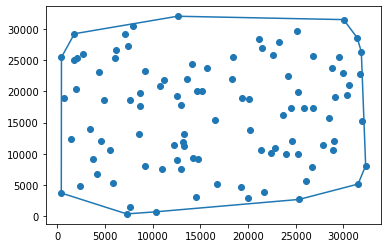

In [103]:
import matplotlib.pyplot as plt

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 
plt.show()